In [1]:
from truthnet import truthnet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('/home/ishanu/Dropbox/gibbons_global/data/global2.csv',index_col=0).astype(str).replace('-9','')
df.drop('Dx',axis=1).to_csv('data/global.csv',header=None)

In [7]:
from cognet.cognet import cognet as cg
from cognet.dataFormatter import dataFormatter
from cognet.model import model 
DATA_train0='data/global.csv'
QPATH0='results/global.joblib'
data0 = dataFormatter(samples=DATA_train0)
features0,samples0 = data0.Qnet_formatter()
model0_ = model()
model0_.fit(data_obj=data0,
            min_samples_split=2,
            alpha=0.05,
            max_depth=-1,
            max_feats=-1,
            early_stopping=False,
            verbose=0,
            random_state=None,
            njobs=11)
#model0_.myQnet.training_index=training_index
model0_.save(QPATH0,low_mem=True)


1235
training Qnet -------------
Qnet trained --------------


In [8]:
Tr=truthnet()
## load data and infer qnet
features,samples = Tr.load_data(datapath="data/global.csv")

Tr.fit(fit=False,modelpath="results/global.joblib")
Tr.getDissonance(outfile="mpi_tmp/global_dissonance.csv",processes=11)

In [9]:
suspects=Tr.getSuspects(alpha=.01)
suspects.join(pd.read_csv("data/global.csv"))

,mean_dissonance,CIM12536,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 415,Unnamed: 416,Unnamed: 417,Unnamed: 418,Unnamed: 419,Unnamed: 420,Unnamed: 421,Unnamed: 422,Unnamed: 423,Unnamed: 424


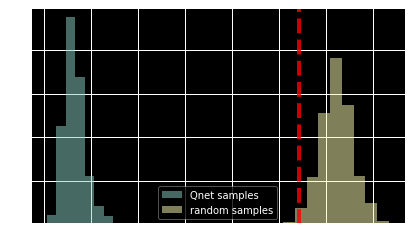

In [10]:
plt.figure()
plt.style.use('dark_background')
dissonance = pd.DataFrame(data=Tr.dissonance.mean(axis=1), columns=["Qnet"])
dissonance["random"] = Tr.urandom_dissonance_df.mean(axis=1)
plt.hist(dissonance["Qnet"], alpha=0.5, label="Qnet samples")
plt.hist(dissonance["random"], alpha=0.5, label="random samples")
plt.legend()
plt.axvline(Tr.cithreshold[('suspect',0.01)][0], color="red", linestyle="--", alpha=.8)

In [14]:
coresamples=Tr.getCoresamples(alpha=.01,steps=70)
coresamples.join(pd.read_csv("data/global.csv"))

QUEUEING TASKS | :   0%|          | 0/1235 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1235 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1235 [00:00<?, ?it/s]

,mean_dissonance,CIM12536,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 415,Unnamed: 416,Unnamed: 417,Unnamed: 418,Unnamed: 419,Unnamed: 420,Unnamed: 421,Unnamed: 422,Unnamed: 423,Unnamed: 424
0,0.024964,CIS69110,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.045229,CIQ85803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.036302,CIM76210,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.040095,CIM49950,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.037531,CIS49236,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,0.041619,MHB77415,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1231,0.029141,KHA81506,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1232,0.034812,KHA93184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1233,0.031369,MHB54874,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN


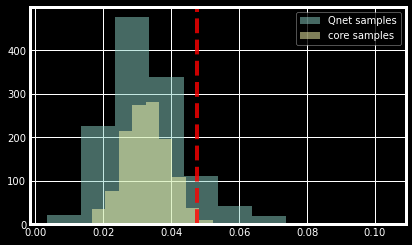

In [15]:
plt.figure()
plt.style.use('dark_background')
dissonance = pd.DataFrame(data=Tr.dissonance.mean(axis=1), columns=["Qnet"])
dissonance["core"] = Tr.null_dissonance_df.mean(axis=1)
plt.hist(dissonance["Qnet"], alpha=0.5, label="Qnet samples")
plt.hist(dissonance["core"], alpha=0.5, label="core samples")
plt.legend()
plt.axvline(Tr.cithreshold[('core',0.01)][1], color="red", linestyle="--", alpha=.8)

In [16]:
Tr.cithreshold

{('suspect', 0.01): (0.27166201123901185, 0.3516716432415777),
 ('core', 0.01): (0.01788943041229296, 0.047649824791054785)}